# Node and Link analysis: Centrality measures

Centrality measures are used to appraise the "importance" of the elements of the network. The problem is that "importance"
* Is not well-defined
* Depends on the domain of the network

During this seminar we will consider two node centrality measures: *degree centrality* and *closeness centrality*

## Degree Centrality

In fact you have already met the degree centrality in this course. 

Given adjacency matrix $A$ of the **unweighted** and **undirected** graph $G = (V,E)$ degree centrality of the node $v_i$ is computed as:
$$ C_D(i) = \sum_j A_{ji} $$
In order to compare nodes across graphs this measure can be normalized by a factor $\frac{1}{N-1}$



## Closeness Centrality

The most correspondent to the word "central". Closeness centrality is used to identify nodes that can reach other nodes quickly.
$$ C_C(i) = \left[ \sum_{j,\ j\neq i} d(v_i, v_j) \right]^{-1}\text{,} $$
where $d(v_i, v_j)$ is a length of the shortest path between $v_i$ and $v_j$. Again, to be normalized it is multiplied by $(N-1)$.

## Why?

Centralities allow us to
* Understand the structure of the graph without looking at it
* Compare nodes of a graph (between graphs) and identify the most "important"
* Compare graphs*

In [1]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
import pprint
pp = pprint.PrettyPrinter(indent=4)
%matplotlib inline

## Example: Zachary's Karate Club

Let's load Zachary's Karate Club network. This is quite small example so we can both calculate centralities and map them of the picture of the graph

In [2]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G) # Fix node positions on all pictures

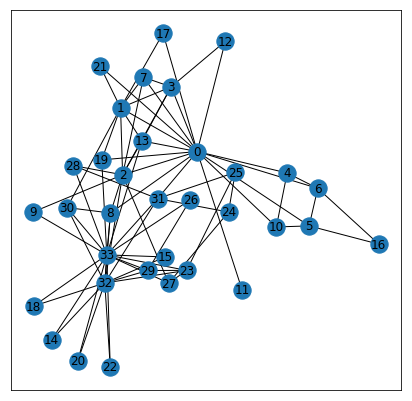

In [3]:
# Original network
plt.figure(1, figsize=(7,7))
nx.draw_networkx(G, pos)

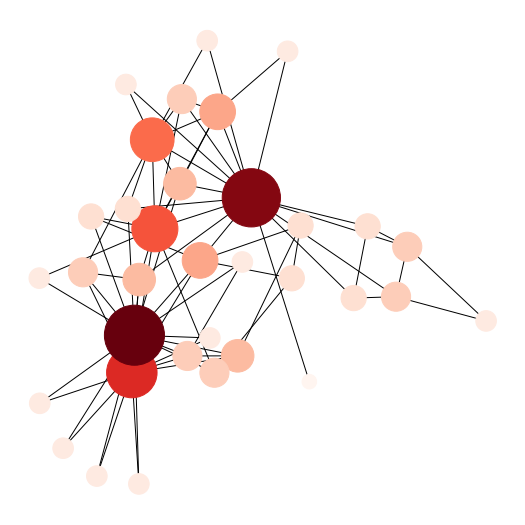

In [5]:
# Degree centrality
dc = nx.degree_centrality(G)
plt.figure(2, figsize=(7,7))
coord = nx.spring_layout(G)
nx.draw(G,
          pos,
          nodelist=list(dc.keys()),
          node_size = [d*7000 for d in list(dc.values())],
          node_color=list(dc.values()),
          font_size=8,
          cmap=plt.cm.Reds,
          )

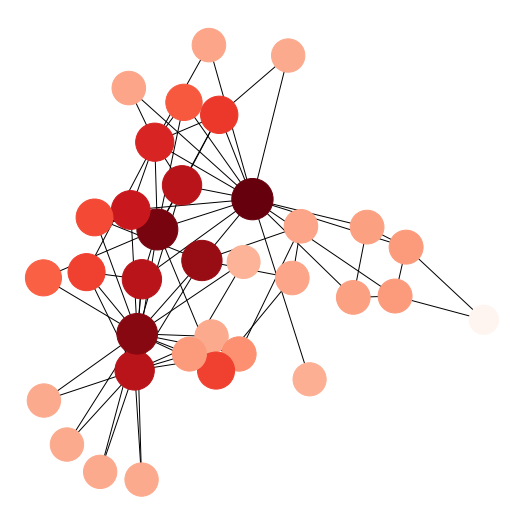

In [6]:
# Closeness centrality
cl = nx.closeness_centrality(G)
plt.figure(1, figsize=(7,7))
coord = nx.spring_layout(G)
nx.draw(G,
          pos,
          nodelist=list(cl.keys()),
          node_size = [d*3000 for d in list(cl.values())],
          node_color=list(cl.values()),
          font_size=8,
          cmap=plt.cm.Reds,
          )

Text(0,0.5,'Closeness Centrality')

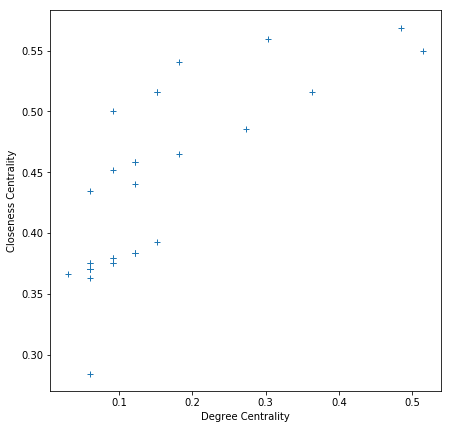

In [7]:
# Plot degree-closeness 
xdata = list(dc.values())
ydata = list(cl.values())
plt.figure(1, figsize=(7,7))
plt.plot(xdata,ydata, '+')
plt.xlabel('Degree Centrality')
plt.ylabel('Closeness Centrality')

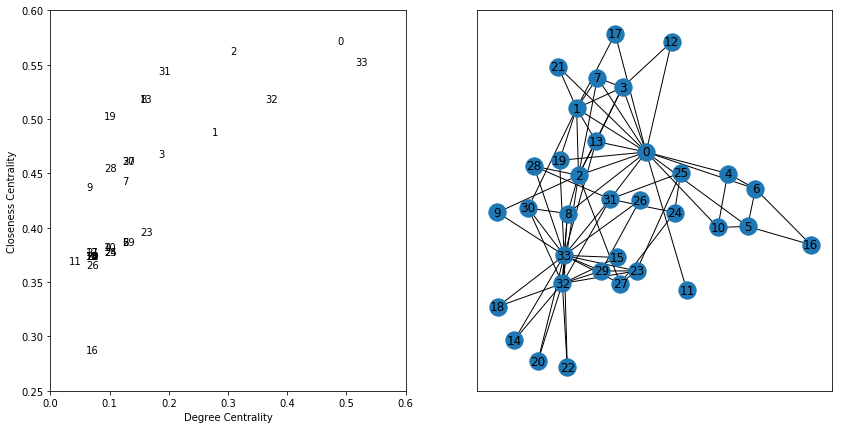

In [8]:
# Not Clear. Lets add node ids:
fig = plt.figure(1, figsize=(14,7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for v in range(len(dc)):
   ax1.text(x = xdata[v], y = ydata[v], s=str(v))
ax1.set_xlim(0, 0.6)
ax1.set_ylim(0.25, 0.6)
ax1.set_xlabel('Degree Centrality')
ax1.set_ylabel('Closeness Centrality')

ax2 = nx.draw_networkx(G, pos)